## Step:1 Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv('data_sets/HeightWeight.csv')

In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
df.duplicated().sum() # check the duplicated values

0

In [6]:
df.describe() # descriptive statistics

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [7]:
df.corr() # correlation graph

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


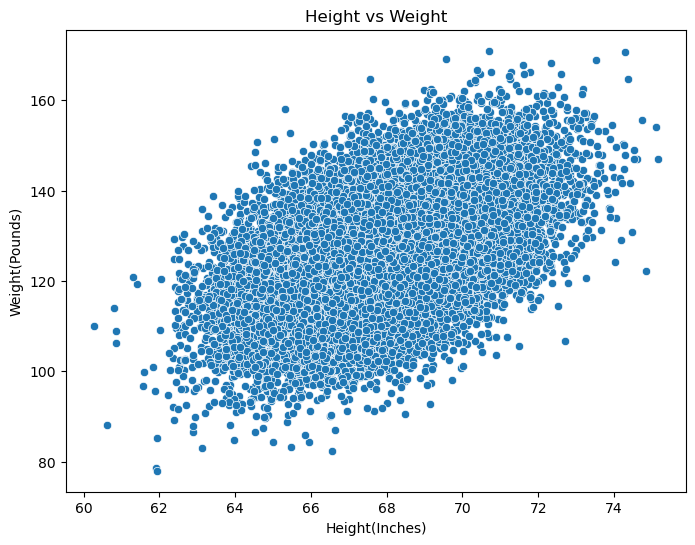

In [8]:
# scatter plot to show the relationship between Height and Wieght
plt.figure(figsize=(8,6))
sns.scatterplot(x='Height(Inches)', y='Weight(Pounds)', data=df)
plt.title('Height vs Weight')
plt.show()

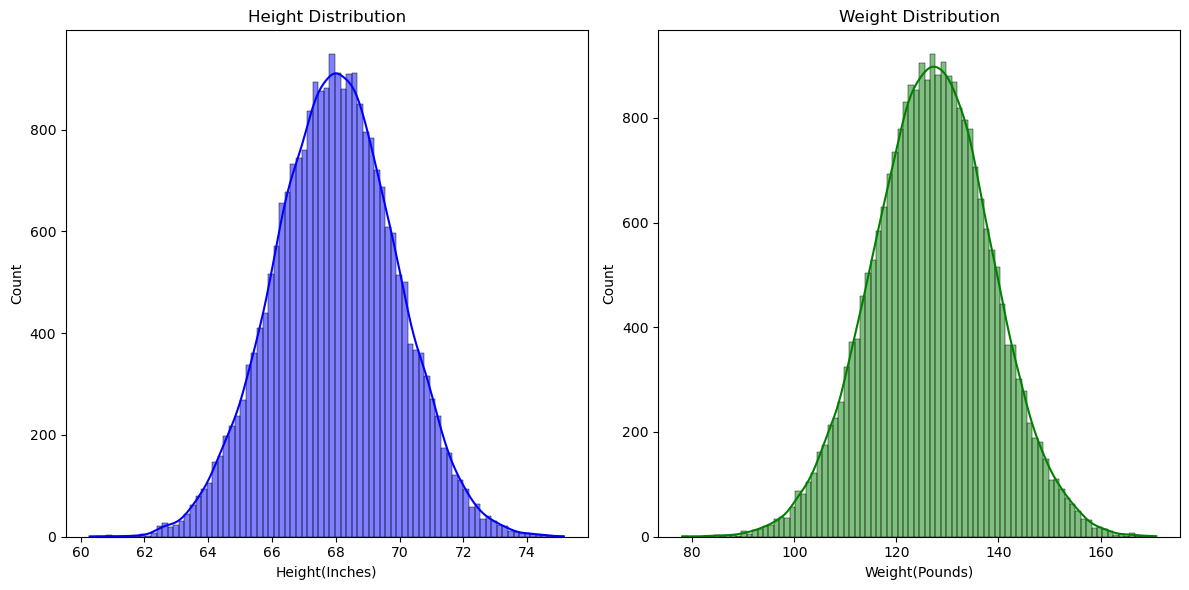

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# First subplot: Height Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Height(Inches)'], kde=True, color='blue')
plt.title('Height Distribution')

# Second subplot: Weight Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Weight(Pounds)'], kde=True, color='green')
plt.title('Weight Distribution')

# Show the plots
plt.tight_layout()
plt.show()


In [10]:
df['Height(Inches)'].values

array([65.78331, 71.51521, 69.39874, ..., 64.69855, 67.52918, 68.87761])

In [11]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [12]:
height = df['Height(Inches)'].value_counts().sum()

In [13]:
weight = df['Weight(Pounds)'].value_counts().sum()

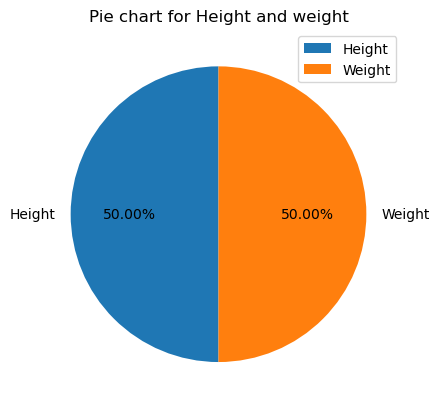

In [14]:
data = [height,weight]
labels=['Height','Weight'] 
plt.pie(data, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Pie chart for Height and weight')
plt.legend()
plt.savefig('pie_chart.png')
plt.show()

In [15]:
df.isnull().sum() # check for null values

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

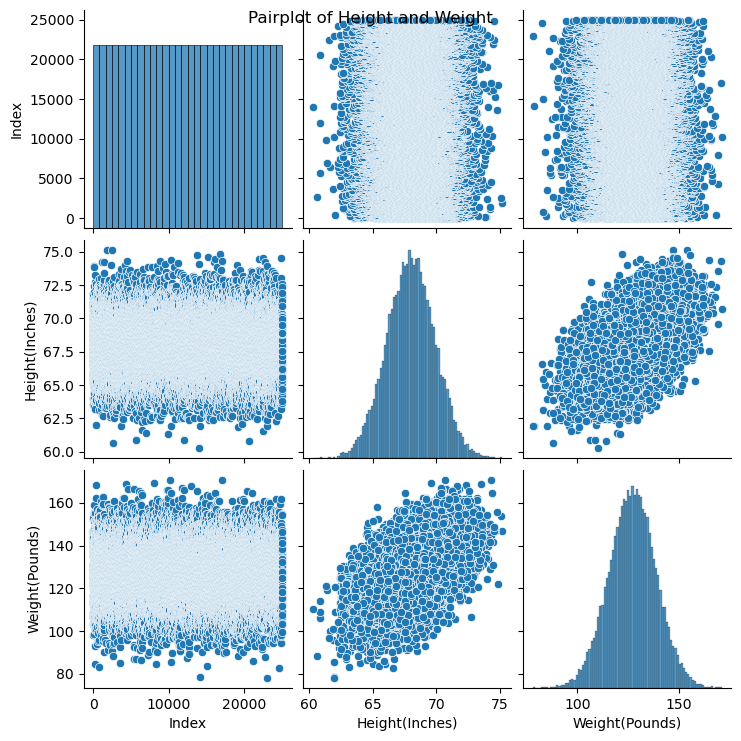

In [16]:
sns.pairplot(df) # show the relationships between the features
plt.suptitle('Pairplot of Height and Weight')
plt.show()

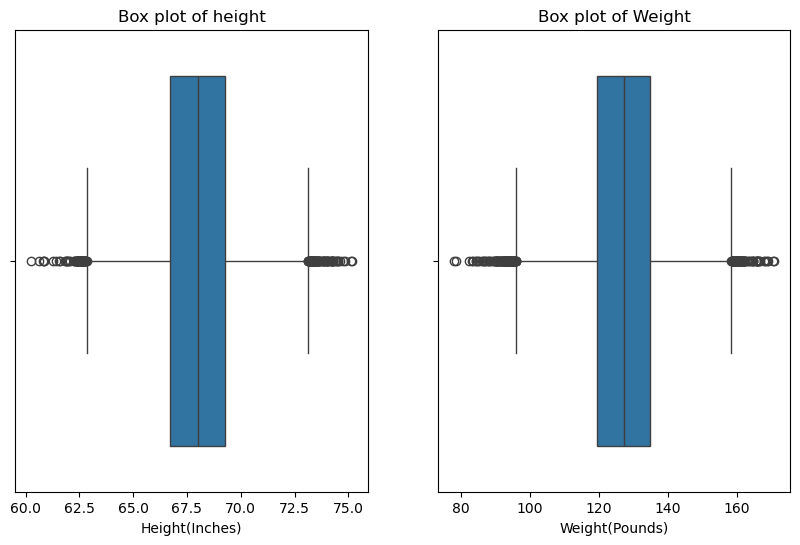

In [17]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(df, x='Height(Inches)')
plt.title('Box plot of height')


plt.subplot(1,2,2)
sns.boxplot(df, x='Weight(Pounds)')
plt.title('Box plot of Weight')
plt.show()

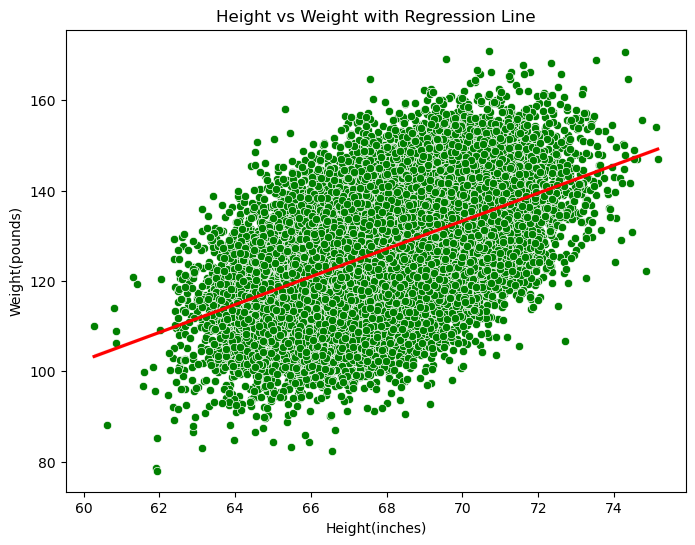

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,  x='Height(Inches)', y='Weight(Pounds)', color='green')
sns.regplot(x='Height(Inches)', y='Weight(Pounds)', data=df, scatter=False, color='red') # regression plot
plt.title('Height vs Weight with Regression Line')
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.show()

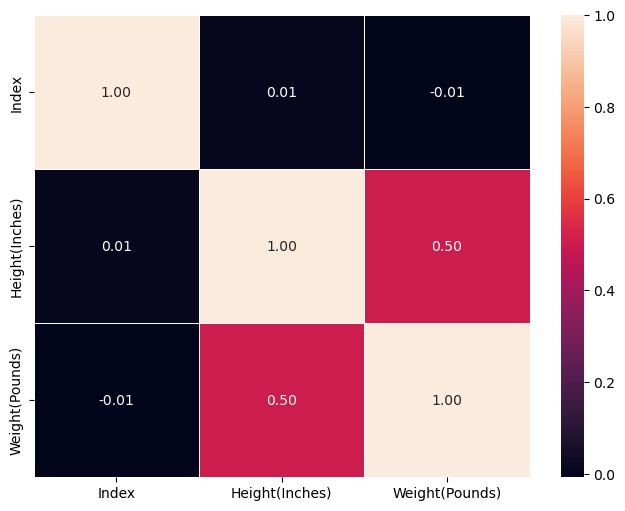

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidth=0.5)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
# Defining the features and target variable
X = df[['Height(Inches)']] # Features (Independent variable)
y = df['Weight(Pounds)'] # Target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000,), (5000,))

In [21]:
# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train) # need to fit_transform if scaled

# make predictions on the test set
y_pred = model.predict(X_test)

# save the model inside the 'Model' directory
model_filepath = 'model/linear_regression_model.pkl'
joblib.dump(model, model_filepath)

['model/linear_regression_model.pkl']

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
# Display the coefficients of the model
print('Intercept: ', model.intercept_)
print('Coefficient for Height: ', model.coef_)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# calculate R-squared score(R^2)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error(MSE):{mse}")
print(f"Root Mean Squared Error(RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

Intercept:  -81.73686228241512
Coefficient for Height:  [3.07124501]
Mean Squared Error(MSE):102.48790963792536
Root Mean Squared Error(RMSE): 10.123631247626781
R-squared (R^2): 0.26059113512888565


C:\Users\adabh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\adabh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


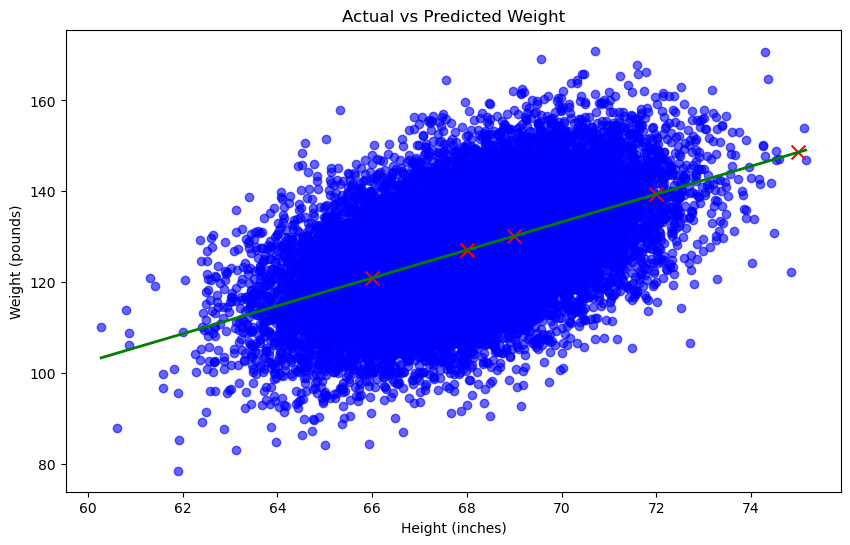

In [23]:
# load the saved linear model
loaded_model = joblib.load('model/linear_regression_model.pkl')

# Input values (new heights for prediction)
new_heights = np.array([66,72,75,68,69]).reshape(-1,1) # Example heights in inches

# Predict the corresponding weights for the new heights
predicted_weights = loaded_model.predict(new_heights)

# plot Actual vs Predicted Values
plt.figure(figsize=(10,6))

# plotting the actual data (for training set) as a scatter plot
plt.scatter(X_train, y_train, color='blue', label='Actual Data', alpha=0.6)

# plotting the predicted values (for new input heights)
plt.scatter(new_heights, predicted_weights, color='red', label='Predicted_Values', marker='x', s=100)

# plot the line of best fit (linear regression line)
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
y_range = loaded_model.predict(x_range)
plt.plot(x_range, y_range, color='green', label='Regression Line', linewidth=2)

# Adding labels and title
plt.title('Actual vs Predicted Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

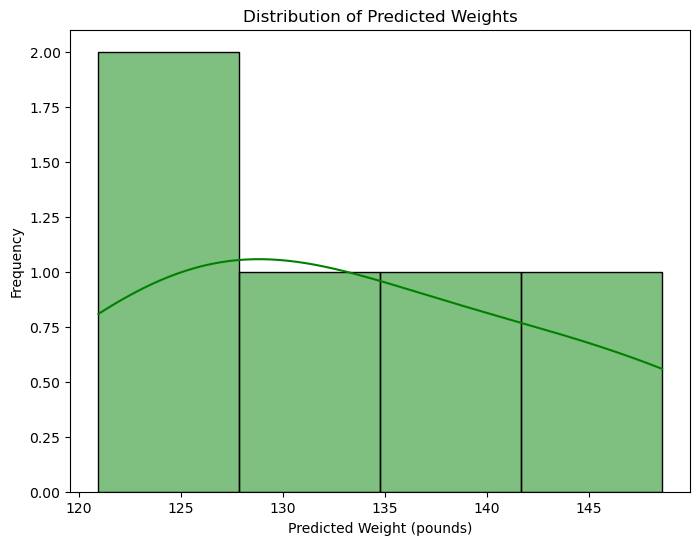

In [24]:
# plotting the distribution of predicted weights
plt.figure(figsize=(8,6))
sns.histplot(predicted_weights, kde=True, color='green')
plt.title('Distribution of Predicted Weights')
plt.xlabel('Predicted Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

R-Squared: 0.26059113512888565
Mean Squared Error: 102.48790963792536


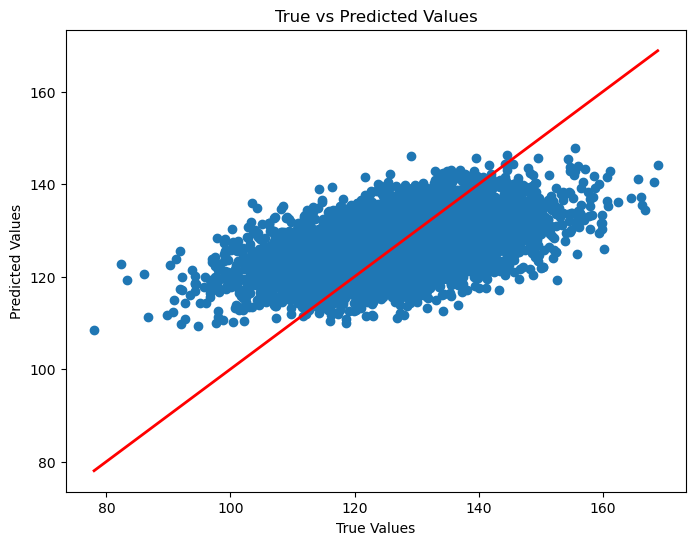

In [25]:
# Evaluate the model using R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-Squared: {r2}")
print(f"Mean Squared Error: {mse}")

# plot the true vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  color='red', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

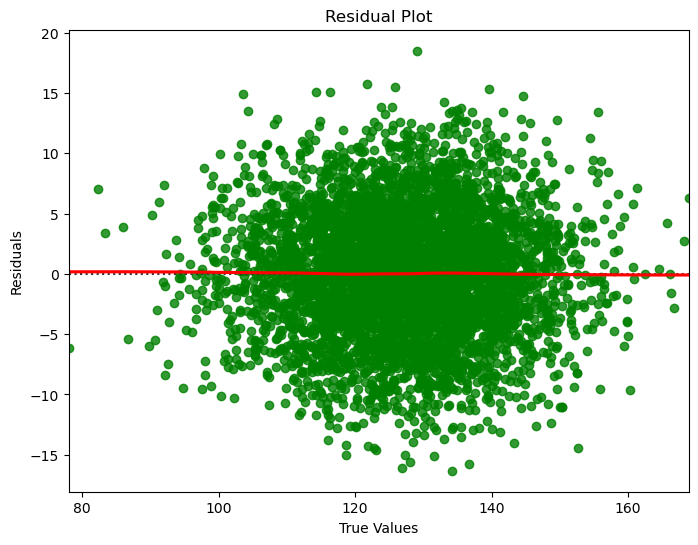

In [26]:
# plotting the residuals
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='green', line_kws={'color':'red'})
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

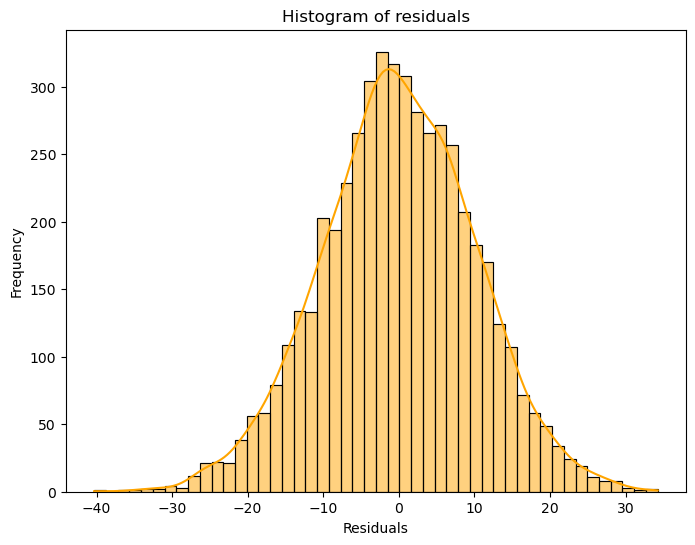

In [27]:
# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Coefficient for Height:  [3.07124501]


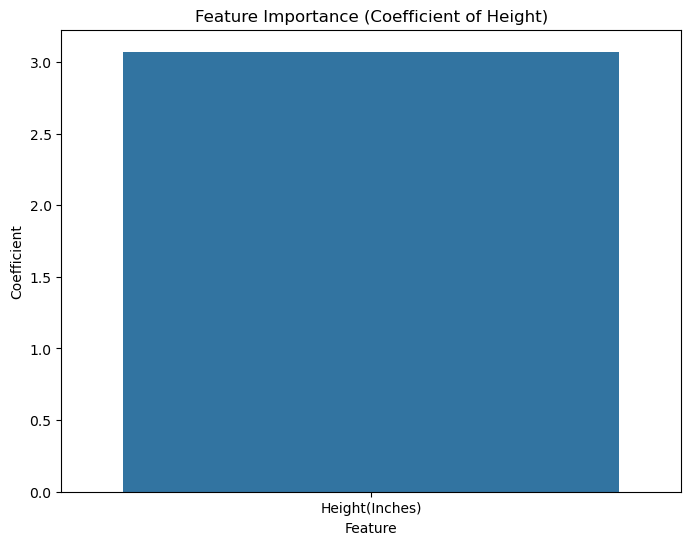

In [28]:
# Get the coefficient from the linear regression model
print('Coefficient for Height: ', model.coef_)

# Plotting the coefficient
plt.figure(figsize=(8,6))
sns.barplot(x=['Height(Inches)'], y=model.coef_)
plt.title('Feature Importance (Coefficient of Height)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.linear_model import Ridge

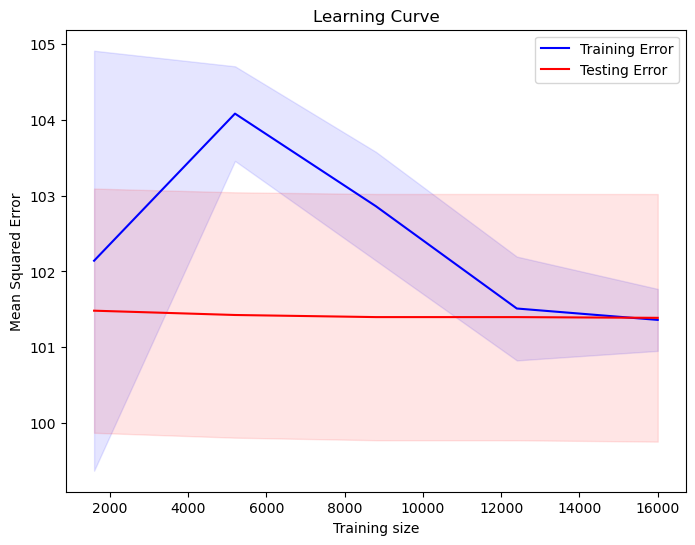

In [30]:
# learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# calculate the mean ans standard deviation of the training and testing scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Testing Error', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

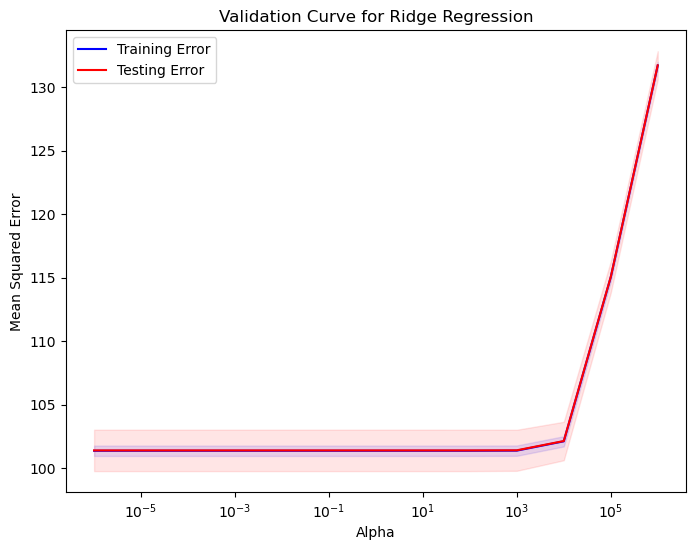

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Ridge regression model
ridge = Ridge()

# Range of alpha values (regularization strength)
param_range = np.logspace(-6, 6, 13)

# Calculate the validation curve for Ridge regression
train_scores, test_scores = validation_curve(
    ridge, X_train, y_train, param_name='alpha', param_range=param_range,
    scoring='neg_mean_squared_error', n_jobs=1
)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -train_scores.mean(axis=1)  # Convert negative MSE back to positive
test_mean = -test_scores.mean(axis=1)    # Convert negative MSE back to positive
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Error", color='blue')
plt.plot(param_range, test_mean, label='Testing Error', color='red')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xscale('log')
plt.title('Validation Curve for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


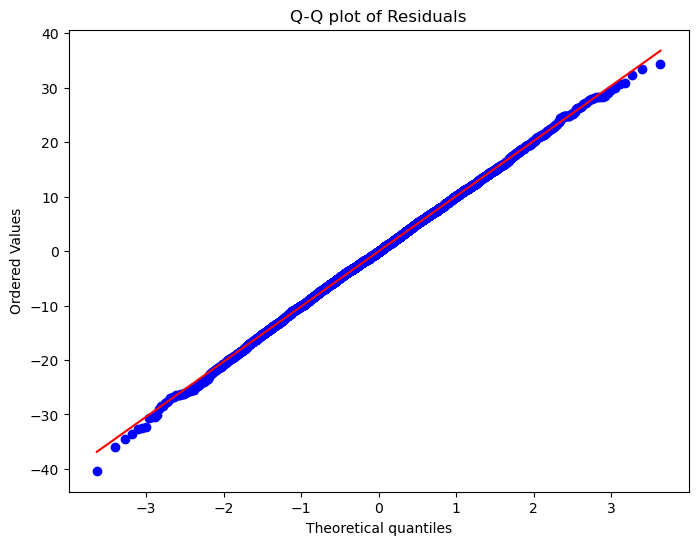

In [32]:
import scipy.stats as stats

#Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

### Batch Gradient Descent

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df[['Height(Inches)']].values  # Independent Variable
Y = df['Weight(Pounds)'].values    # Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (intercept) to the features (X)
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Fixed typo here

# Initialize parameters (theta) with small random values
np.random.seed(42)  # Ensures reproducibility
theta = np.random.randn(2)
learning_rate = 0.001
iterations = 1000
m = len(y_train)

# Gradient Descent
for i in range(iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (2 / m) * X_train_b.T.dot(errors)

    # Debugging: print gradients and theta every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Gradients: {gradients}, Theta: {theta}")

    theta -= learning_rate * gradients

# Final parameters (theta_0, theta_1)
print('Trained theta values:')
print(f"Intercept (theta_0): {theta[0]}")
print(f"Slope (theta_1): {theta[1]}")

# Make predictions using the trained model
y_pred = X_test_b.dot(theta)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Iteration 0: Gradients: [-253.17587134  -11.93842594], Theta: [ 0.49671415 -0.1382643 ]
Iteration 100: Gradients: [-207.24136403   -9.77239918], Theta: [23.46396781  0.94474908]
Iteration 200: Gradients: [-169.64090115   -7.99936157], Theta: [42.26419925  1.83126789]
Iteration 300: Gradients: [-138.8624104    -6.54801184], Theta: [57.65344462  2.55694275]
Iteration 400: Gradients: [-113.66815957   -5.35998513], Theta: [70.25057004  3.15095611]
Iteration 500: Gradients: [-93.04498218  -4.3875059 ], Theta: [80.56215874  3.63719572]
Iteration 600: Gradients: [-76.16353375  -3.59146668], Theta: [89.00288295  4.03521533]
Iteration 700: Gradients: [-62.34494046  -2.93985541], Theta: [95.9121796   4.36102097]
Iteration 800: Gradients: [-51.0334987   -2.40646805], Theta: [101.56790048   4.62771465]
Iteration 900: Gradients: [-41.77432796  -1.96985486], Theta: [106.19748584   4.84602124]
Trained theta values:
Intercept (theta_0): 109.98711074585516
Slope (theta_1): 5.024719771482846
Mean Square